In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import glob

import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
%matplotlib inline
# %matplotlib notebook
matplotlib.rcParams['figure.figsize'] = (10, 8)

In [44]:
location = "/Users/weilu/Research/server/nov_2017/27nov/no_side_contraint_memb_3_rg_manual_lipid_0.6_extended/add_small_force/0/"
wham_file = location + "wham.0.dat"
wham = pd.read_csv(wham_file)
wham.columns = wham.columns.str.strip()

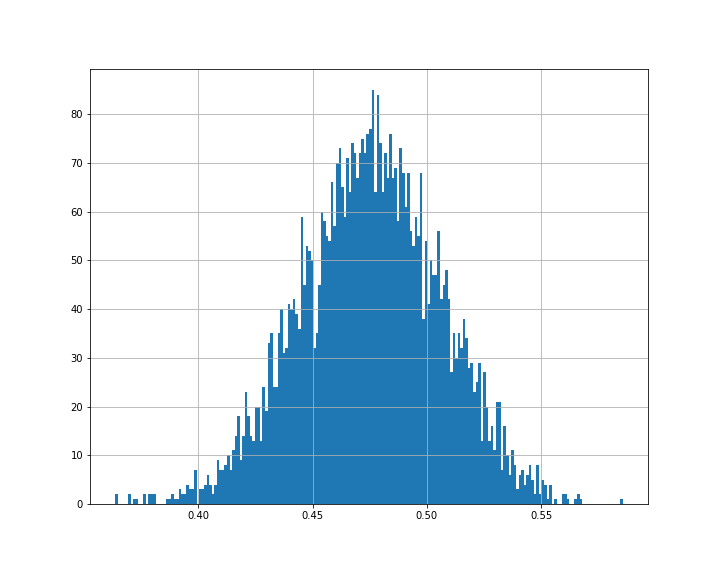

In [45]:
wham.Qw.hist(bins=200)

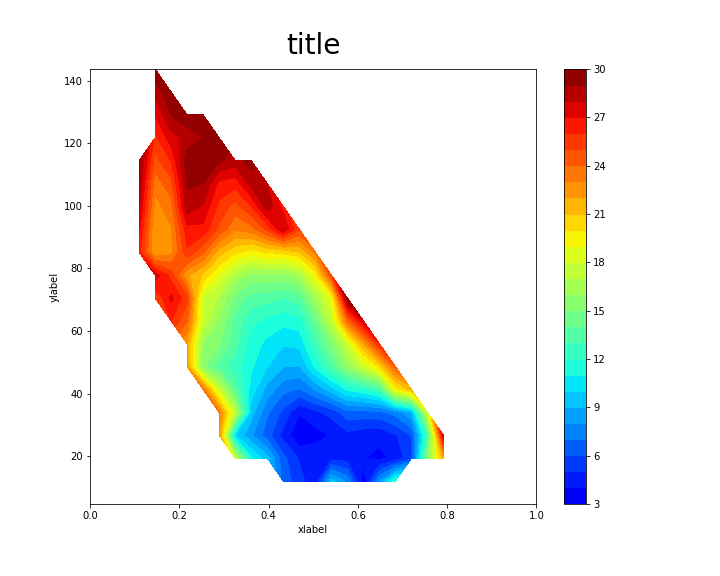

In [48]:
location = "/Users/weilu/Research/davinci/nov_2017/27nov/dec02_no_side_2/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended_350-550/2d_qw_dis/force_0.0/"
filename = location + "pmf-400.dat"
x = 1
y = 2
z = 3
xmin, xmax = 0, 1
ymin, ymax = 0, 150
zmin, zmax = 0, 30
xlabel, ylabel = "xlabel", "ylabel"
title = "title"
titlefontsize = 28

data = np.loadtxt(filename)
data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
data = data[~(data[:,z] < zmin)]

xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
# plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
jet = cm = plt.get_cmap('jet')
print(jet)
# plt.contourf(xi, yi, zi, 20, cmap='rainbow')
plt.figure()
plt.contourf(xi, yi, zi, 30, cmap='jet')
plt.xlim(xmin, xmax)
plt.clim(zmin, zmax)
plt.colorbar()

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title, y=1.02, fontsize = titlefontsize)
#plt.tight_layout()
#plt.axis('equal')
#plt.axes().set_aspect('equal')
#plt.axes().set_aspect('scaled')
# plt.savefig(args.outname, dpi=args.dpi, bbox_inches='tight')
plt.show()

In [56]:
file = "wham.0.dat"
b = pd.read_csv(location+file)

In [63]:
location = "/Users/weilu/Research/server/nov_2017/13nov/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/simulation/dis_100.0/0/"
qc = pd.read_table(location+f"qc_{i}", names=["qc"])[1:].reset_index(drop=True)
qn = pd.read_table(location+f"qn_{i}", names=["qn"])[1:].reset_index(drop=True)
qc2 = pd.read_table(location+f"qc2_{i}", names=["qc2"])[1:].reset_index(drop=True)

In [65]:
pd.concat([a,b],axis=1)

,qc,Steps,Qw,Rg,Tc,Energy
0,0.098,4000,0.052376,96.576704,119,-230.463252
1,0.128,8000,0.062897,81.994732,121,-385.307319
2,0.166,12000,0.080449,69.938002,146,-465.731833
3,0.215,16000,0.104170,61.379717,151,-567.267901
4,0.221,20000,0.112049,56.330383,158,-601.194773
5,0.217,24000,0.113051,53.002372,152,-635.965014
6,0.219,28000,0.116622,51.394586,172,-690.651929
7,0.219,32000,0.119104,50.629356,169,-739.482429
8,0.213,36000,0.120307,50.940639,180,-777.368209
9,0.191,40000,0.118846,51.073804,170,-761.275873


In [71]:
location = "/Users/weilu/Research/davinci/dec_2017/all_data_folder/no_side_contraint_memb_3_rg_0.4_lipid_0.6_extended/"
a = pd.read_feather(location+"dis100.0.feather")

In [78]:

a["Qn"] = a["qn"]
a["Qc"] = a["qc"]
a["Qc2"] = a["qc2"]
a.drop(["qc","qn","qc2"], axis=1)

,index,Step,Run,Temp,Qw,Energy,Distance,Lipid,AMH-Go,Membrane,Rg,TotalE,Qc,Qn,Qc2
0,0,4000,0,T1,0.052376,-230.463252,260.697458,0.002846,-320.672985,-89.808640,20.289161,-230.460406,0.098,0.111,0.183
1,11,4000,8,T8,0.048493,44.765478,261.934545,0.039555,-273.643131,-94.959967,17.988436,44.805033,0.095,0.089,0.195
2,10,4000,7,T7,0.046195,99.783921,264.293987,0.020403,-269.317465,-98.032087,19.582566,99.804323,0.080,0.110,0.153
3,9,4000,3,T2,0.050422,-178.276749,259.472901,0.017870,-315.660777,-91.853011,15.716146,-178.258879,0.096,0.103,0.151
4,7,4000,2,T3,0.049041,-226.827483,266.022021,0.012576,-312.740668,-82.659715,13.856081,-226.814907,0.092,0.105,0.163
5,6,4000,6,T6,0.045750,11.781813,261.725221,0.024576,-287.356174,-87.152555,18.375624,11.806389,0.089,0.083,0.154
6,8,4000,10,T10,0.043264,285.365172,255.945450,0.015740,-242.037148,-100.941627,18.171787,285.380913,0.076,0.090,0.132
7,4,4000,5,T4,0.049164,-58.635146,261.994426,0.025020,-297.591449,-89.152319,21.201030,-58.610126,0.095,0.101,0.157
8,3,4000,9,T9,0.043879,173.111882,261.513616,0.032071,-263.504692,-95.854355,16.238814,173.143953,0.083,0.087,0.157
9,2,4000,1,T0,0.054363,-263.514703,261.605500,0.017367,-330.549656,-84.522104,12.297805,-263.497336,0.106,0.117,0.188


In [73]:
a.set_index('TotalE').reset_index()

,TotalE,index,Step,Run,Temp,Qw,Energy,qn,qc,qc2,Distance,Lipid,AMH-Go,Membrane,Rg
0,-230.460406,0,4000,0,T1,0.052376,-230.463252,0.111,0.098,0.183,260.697458,0.002846,-320.672985,-89.808640,20.289161
1,44.805033,11,4000,8,T8,0.048493,44.765478,0.089,0.095,0.195,261.934545,0.039555,-273.643131,-94.959967,17.988436
2,99.804323,10,4000,7,T7,0.046195,99.783921,0.110,0.080,0.153,264.293987,0.020403,-269.317465,-98.032087,19.582566
3,-178.258879,9,4000,3,T2,0.050422,-178.276749,0.103,0.096,0.151,259.472901,0.017870,-315.660777,-91.853011,15.716146
4,-226.814907,7,4000,2,T3,0.049041,-226.827483,0.105,0.092,0.163,266.022021,0.012576,-312.740668,-82.659715,13.856081
5,11.806389,6,4000,6,T6,0.045750,11.781813,0.083,0.089,0.154,261.725221,0.024576,-287.356174,-87.152555,18.375624
6,285.380913,8,4000,10,T10,0.043264,285.365172,0.090,0.076,0.132,255.945450,0.015740,-242.037148,-100.941627,18.171787
7,-58.610126,4,4000,5,T4,0.049164,-58.635146,0.101,0.095,0.157,261.994426,0.025020,-297.591449,-89.152319,21.201030
8,173.143953,3,4000,9,T9,0.043879,173.111882,0.087,0.083,0.157,261.513616,0.032071,-263.504692,-95.854355,16.238814
9,-263.497336,2,4000,1,T0,0.054363,-263.514703,0.117,0.106,0.188,261.605500,0.017367,-330.549656,-84.522104,12.297805


In [69]:
a["Energy"],a["TotalE"] = a["TotalE"], a["Energy"]

In [70]:
a

,index,Step,Run,Temp,Qw,Energy,qn,qc,qc2,Distance,Lipid,AMH-Go,Membrane,Rg,TotalE
0,0,4000,0,T1,0.052376,-230.460406,0.111,0.098,0.183,260.697458,0.002846,-320.672985,-89.808640,20.289161,-230.460406
1,11,4000,8,T8,0.048493,44.805033,0.089,0.095,0.195,261.934545,0.039555,-273.643131,-94.959967,17.988436,44.805033
2,10,4000,7,T7,0.046195,99.804323,0.110,0.080,0.153,264.293987,0.020403,-269.317465,-98.032087,19.582566,99.804323
3,9,4000,3,T2,0.050422,-178.258879,0.103,0.096,0.151,259.472901,0.017870,-315.660777,-91.853011,15.716146,-178.258879
4,7,4000,2,T3,0.049041,-226.814907,0.105,0.092,0.163,266.022021,0.012576,-312.740668,-82.659715,13.856081,-226.814907
5,6,4000,6,T6,0.045750,11.806389,0.083,0.089,0.154,261.725221,0.024576,-287.356174,-87.152555,18.375624,11.806389
6,8,4000,10,T10,0.043264,285.380913,0.090,0.076,0.132,255.945450,0.015740,-242.037148,-100.941627,18.171787,285.380913
7,4,4000,5,T4,0.049164,-58.610126,0.101,0.095,0.157,261.994426,0.025020,-297.591449,-89.152319,21.201030,-58.610126
8,3,4000,9,T9,0.043879,173.143953,0.087,0.083,0.157,261.513616,0.032071,-263.504692,-95.854355,16.238814,173.143953
9,2,4000,1,T0,0.054363,-263.497336,0.117,0.106,0.188,261.605500,0.017367,-330.549656,-84.522104,12.297805,-263.497336


In [37]:
data = pd.read_csv("/Users/weilu/Downloads/Default Dataset-2.csv", header=None, names=["x", "y"])
data

,x,y
0,0.081951,-0.368112
1,0.099926,-0.449932
2,0.153837,-0.667842
3,0.197925,-0.803559
4,0.250138,-0.883806
5,0.294199,-0.964428
6,0.361059,-0.988906
7,0.426181,-0.793079
8,0.476669,-0.680568
9,0.515664,-0.403295


In [38]:
data = pd.read_csv("/Users/weilu/Downloads/Default Dataset-3.csv", header=None, names=["x", "y"])

In [39]:
data

,x,y
0,0.042579,0.125948
1,0.078448,0.127595
2,0.106165,0.128867
3,0.156666,0.213831
4,0.184356,0.270198
5,0.220198,0.326940
6,0.259301,0.383832
7,0.291882,0.440425
8,0.316324,0.469095
9,0.355400,0.581082


In [40]:
x = data["x"].values

In [41]:
y = data["y"].values

<IPython.core.display.Javascript object>


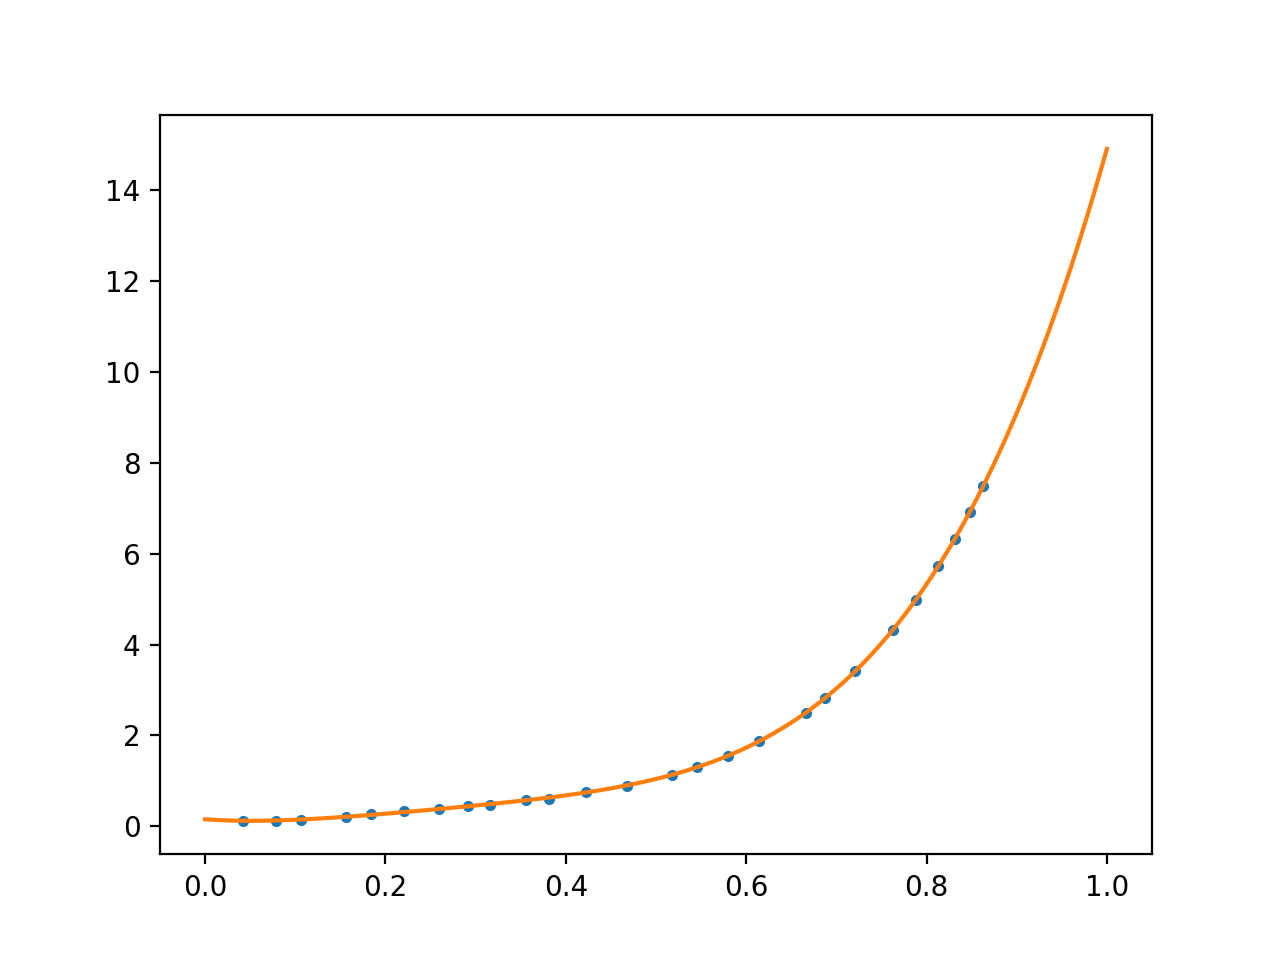

In [42]:
order = 4
plt.figure()
p = np.poly1d(np.polyfit(x, y, order))
xp = np.linspace(0, 1, 1000)
_ = plt.plot(x, y, '.', xp, p(xp), '-')

In [34]:
np.vstack((xp, p(xp))).T

array([[  0.00000000e+00,   7.25512889e-02],
       [  1.00100100e-03,   6.61331844e-02],
       [  2.00200200e-03,   5.97415234e-02],
       ..., 
       [  9.97997998e-01,   1.48552680e+01],
       [  9.98998999e-01,   1.49268326e+01],
       [  1.00000000e+00,   1.49986371e+01]])

In [23]:
np.concatenate(xp, p(xp)).shape

TypeError: only integer scalar arrays can be converted to a scalar index

In [43]:
np.savetxt("/Users/weilu/Desktop/forYe_2.txt", np.vstack((xp, p(xp))).T)

In [26]:
xs = ["x" + str(i) for i in range(4)]

In [27]:
file_name = "/Users/weilu/Research/davinci/nov_2017/13nov/nov_18_all_freeEnergy_calculation_sample_range_mode_2/tiny/1d_dis/test/evpb-500.dat"
data = pd.read_table(file_name, sep="\s+", skiprows=1, names=["a", "row"] + xs)

In [28]:
data

,a,row,x0,x1,x2,x3
0,0,7.416,-47.994,-556.042,-123.379,25.934
1,1,10.594,-46.413,-511.629,-131.176,25.328
2,2,13.772,-45.912,-537.320,-124.032,21.976
3,3,16.950,-46.609,-525.053,-128.221,23.376
4,4,20.128,-46.699,-536.085,-126.515,23.981
5,5,23.306,-46.227,-533.611,-127.478,23.560
6,6,26.484,-46.499,-536.876,-127.584,23.816
7,7,29.662,-46.344,-537.512,-127.264,23.668
8,8,32.840,-45.969,-534.914,-127.464,23.668
9,9,36.018,-45.622,-532.993,-127.706,23.565


<IPython.core.display.Javascript object>


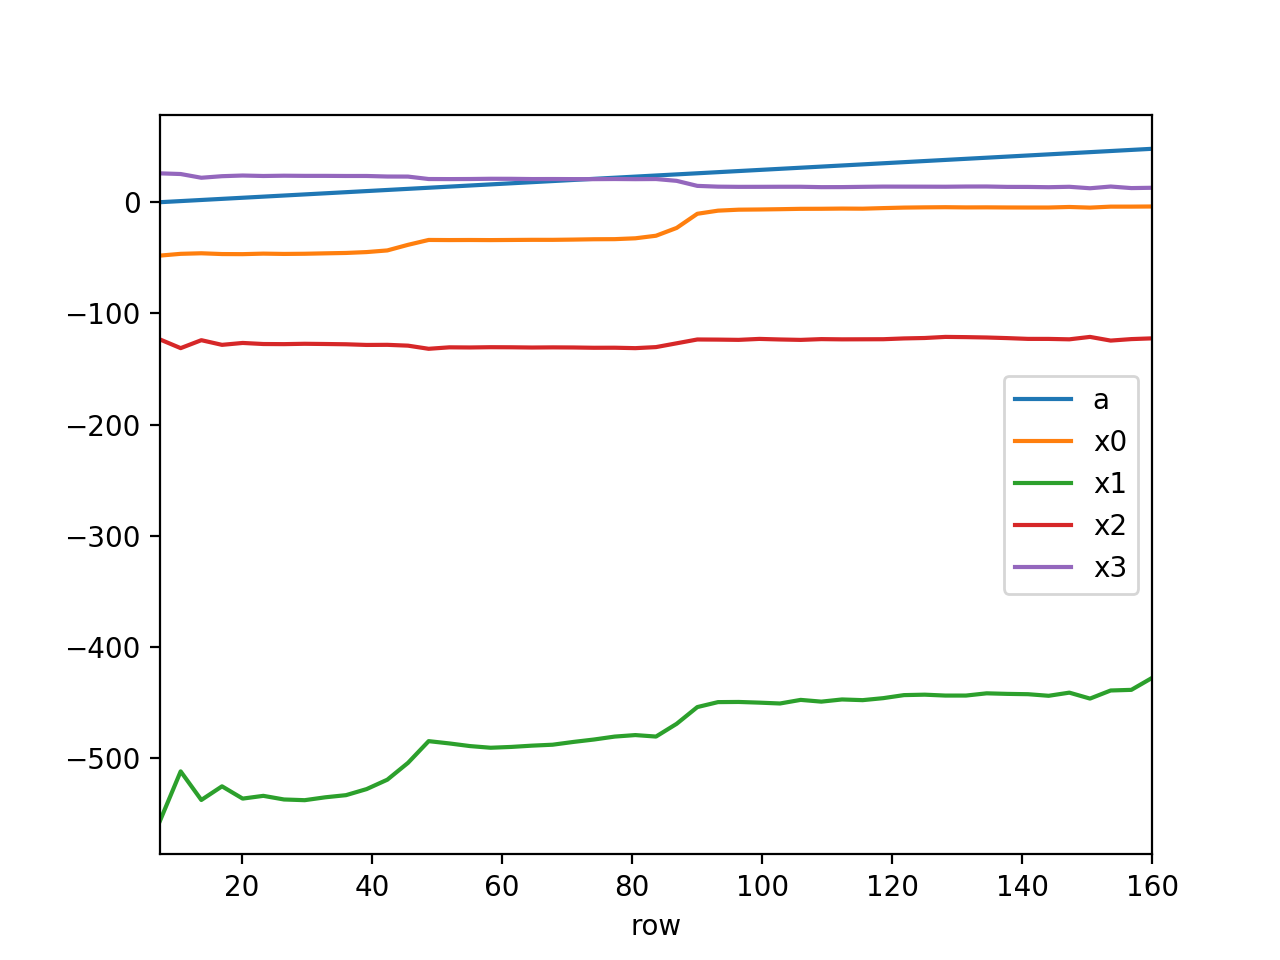

In [29]:
data.plot("row")

In [18]:
file_name = "/Users/weilu/Research/davinci/nov_2017/13nov/all_data_folder/new_next_gen_native_based_memb_3_rg_0.4_lipid_0.6_extended/dis102.0.feather"
pd.read_feather(file_name)


,index,Step,Run,Temp,Qw,Energy,Distance,Lipid,AMH-Go,Membrane,Rg,TotalE
0,0,4000,0,T1,0.050231,-234.766568,265.647076,-0.006706,-307.914444,-91.507692,19.505292,-234.773274
1,11,4000,8,T8,0.045968,116.691673,259.980637,0.013824,-265.076280,-94.914409,18.454996,116.705497
2,10,4000,7,T7,0.043892,93.740996,261.769868,0.004286,-262.986419,-94.705882,21.454883,93.745282
3,9,4000,3,T3,0.051766,-189.528430,263.570988,0.022973,-322.935598,-92.257971,16.866771,-189.505457
4,7,4000,2,T2,0.048512,-229.777776,269.447277,0.004204,-305.492614,-87.394010,16.330156,-229.773571
5,6,4000,6,T6,0.047496,-5.218529,264.982003,0.016421,-283.891603,-95.155745,18.331384,-5.202108
6,8,4000,10,T10,0.041326,309.550477,259.120779,0.016156,-221.961107,-90.828335,22.227939,309.566633
7,4,4000,5,T5,0.047779,-15.438613,259.423772,0.014050,-281.433805,-96.976294,26.207688,-15.424562
8,3,4000,9,T9,0.046371,232.310776,256.865072,0.015319,-246.313400,-92.498208,19.954271,232.326095
9,2,4000,1,T0,0.055467,-256.314428,264.060065,0.005701,-321.907277,-89.737244,13.941821,-256.308727


In [2]:
z_data.as_matrix().shape

NameError: name 'z_data' is not defined

In [19]:
x = np.array([5.05, 5.25, 5.91, 6.54, 7.11, 7.68, 8.26, 8.85, 9.44, 10.01, 10.62, 11.17, 11.75, 12.32, 12.89, 13.46, 14.05, 14.66, 15.28, 15.87, 16.52, 17.12, 17.75, 18.38, 19.04, 19.61, 20.33, 20.94, 21.60, 22.23, 22.91, 23.50, 24.12, 24.77, 25.43, 26.02, 26.68, 27.29, 27.95, 28.58, 29.22, 29.87, 30.53, 31.21, 31.86, 32.39, 32.97, 33.54, 34.09, 34.60, 35.03])
y = [-7.82, -7.78, -7.41, -7.04, -6.63, -6.14, -5.57, -4.96, -4.43, -3.94, -3.41, -2.88, -2.27, -1.70, -1.09, -0.52, -0.07, 0.41, 0.82, 1.23, 1.60, 1.85, 2.10, 2.31, 2.40, 2.56, 2.53, 2.58, 2.55, 2.52, 2.40, 2.25, 2.10, 1.90, 1.67, 1.48, 1.24, 0.97, 0.82, 0.58, 0.39, 0.24, 0.12, -0.03, -0.06, -0.05, -0.05, -0.08, -0.07, -0.07, -0.06]
x += 10

In [20]:
p = np.poly1d(np.polyfit(x, y, 5))
ynew = y - p(43.03356301)
p = np.poly1d(np.polyfit(x, ynew, 5))
d = np.polyder(p, m=1)

In [21]:
p(43.03356301)

4.4053649617126212e-13

In [38]:
def compute_theta(z):
    k_bin = 0.2
    memb_b = 15
    theta = 0.5*(np.tanh(k_bin*(z+memb_b))-np.tanh(k_bin*(z-memb_b)));
    return theta

In [26]:
np.tanh(0.5)

0.46211715726000974

In [29]:
d(14.33)

0.000499517284119122

<IPython.core.display.Javascript object>


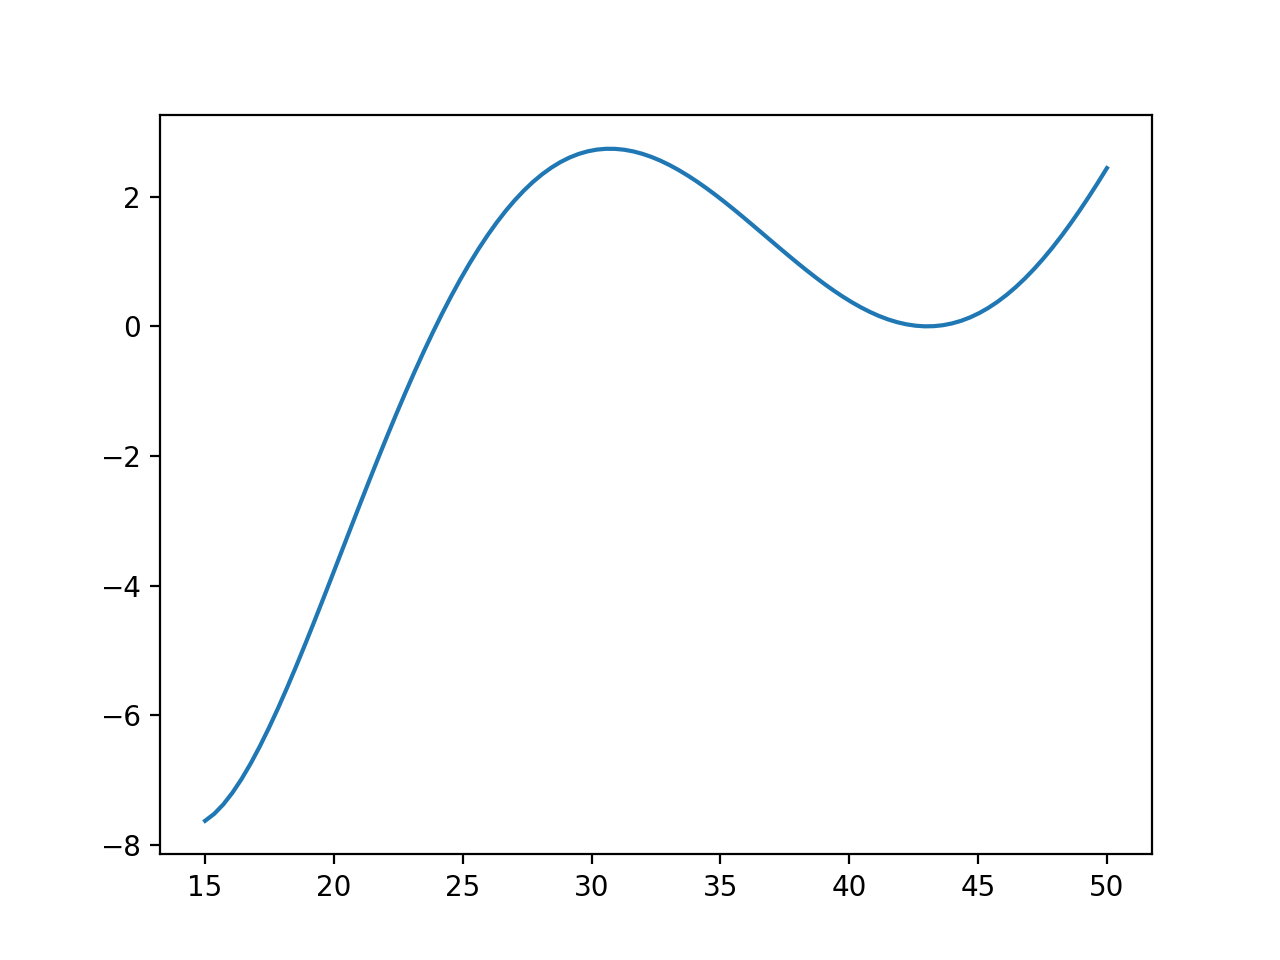

In [33]:
dis = np.linspace(15, 50, 100)
plt.plot(dis, p(dis))

<IPython.core.display.Javascript object>


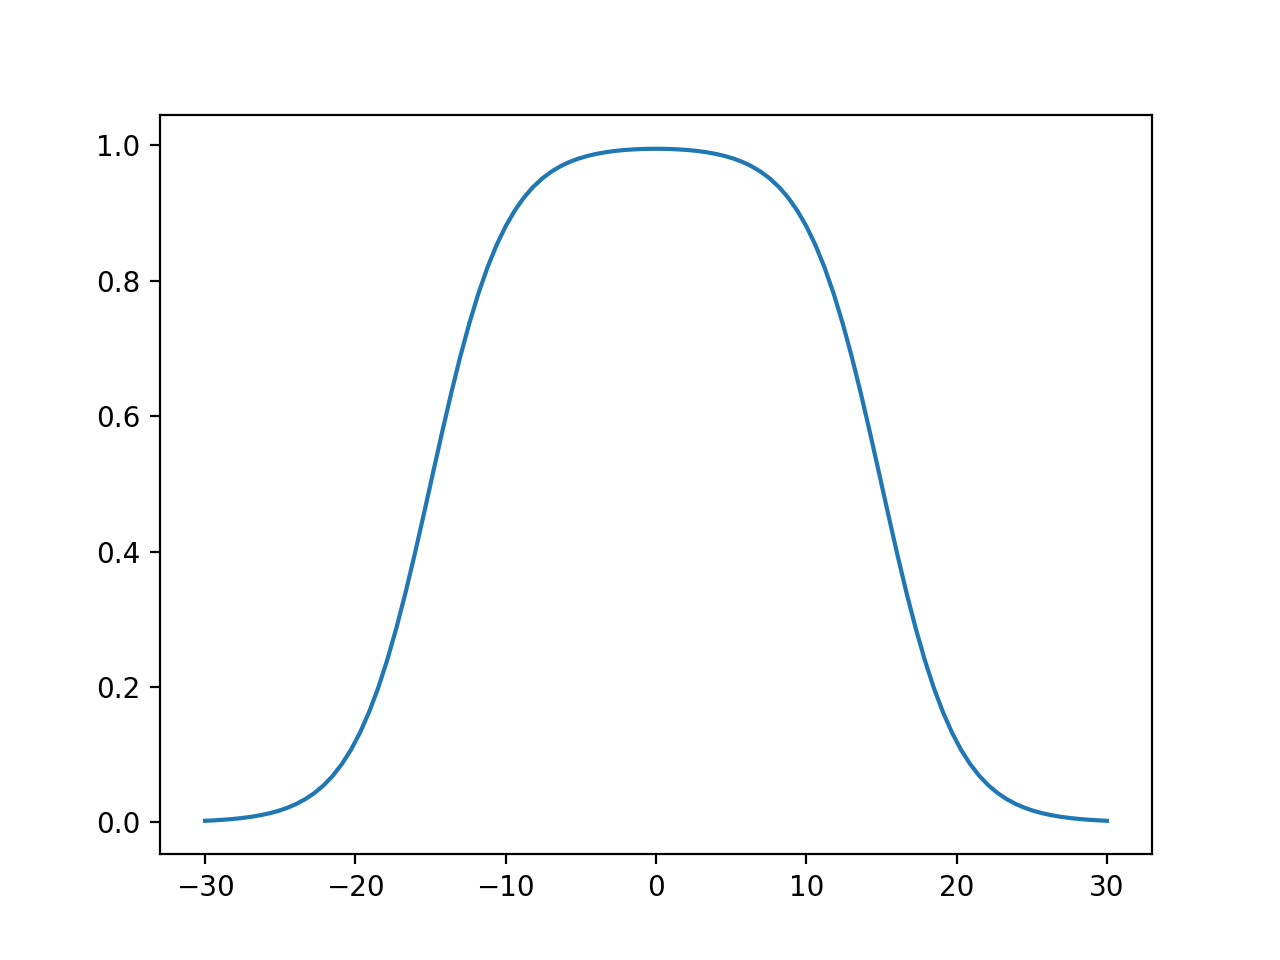

In [39]:
z = np.linspace(-30,30, 100)
plt.plot(z, compute_theta(z))

In [50]:
n = 100
xv, yv = np.meshgrid(dis, z, sparse=False, indexing='ij')
f = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        f[i][j] = p(xv[i,j]) * compute_theta(yv[i,j])

In [73]:
p(15)

-7.6316250583217027

In [80]:
n = 100
f2 = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        f2[i][j] = (p(xv[i,j]) -p(15)) * compute_theta(yv[i,j])

In [81]:
data = [
    go.Surface(
        x=dis,
        y=z,
        z=f2.T
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    scene = dict(
        xaxis = dict(
            title='Dis'),
        yaxis = dict(
            title='Z'),
        zaxis = dict(
            title='f'),),
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='elevations-3d-surface')

In [83]:
data = [
    go.Surface(
        x=dis,
        y=z,
        z=f.T
    )
]
layout = go.Layout(
    title='Mt Bruno Elevation',
    scene = dict(
        xaxis = dict(
            title='Dis'),
        yaxis = dict(
            title='Z'),
        zaxis = dict(
            title='f'),),
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)
fig2 = go.Figure(data=data, layout=layout)
py.iplot(fig2, filename='elevations-3d-surface')

In [66]:
trace1 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[8, 7, 6, 5, 4, 3, 2, 1, 0]
)
trace2 = go.Scatter(
    x=[0, 1, 2, 3, 4, 5, 6, 7, 8],
    y=[0, 1, 2, 3, 4, 5, 6, 7, 8]
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(
        title='AXIS TITLE',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
    yaxis=dict(
        title='AXIS sdfTITLE',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='lightgrey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Old Standard TT, serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='axes-labels')

In [8]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())


def variable_test2(k_list=[1],
                      force_ramp_rate_list=[1],
                      memb_k_list=[1],
                      force_list=["ramp"],
                      rg_list=[0.08],
                      pressure_list=[0.1],
                      repeat=1,
                      mode_list=[2],
                      commons=0,
                      temperature_list=[300],
                      start_from_list=["native"],
                      simulation_model_list=["go"]):
    inputs = locals()
    tmp = {}
    for key,value in test.items():
        if isinstance(value, list):
            tmp[key] = value
    return inputs
#     all_inputs = expand_grid(inputs)
#     for myInput in all_inputs:
#         print(myInput)

In [9]:
start_from_list=["native"]
# start_from_list=["extended", "topology"]
mode_list = [3]  # lipid mediated interaction
# pressure_list = [0, 0.1, 1.0]
pressure_list = [0]
force_ramp_rate_list=[10]
temperature_list=[500]
memb_k_list = [3]
rg_list = [0.1]
force_list = [0.4, 0.5, 0.6, 0.7, 0.8]
repeat = 2
test = variable_test2(temperature_list=temperature_list,
                start_from_list=start_from_list,
                rg_list=rg_list,
                memb_k_list=memb_k_list,
                mode_list=mode_list,
                pressure_list=pressure_list,
                force_ramp_rate_list=force_ramp_rate_list,
                force_list=force_list,
                repeat=repeat,
                commons=1)

In [11]:
test

{'commons': 1,
 'force_list': [0.4, 0.5, 0.6, 0.7, 0.8],
 'force_ramp_rate_list': [10],
 'k_list': [1],
 'memb_k_list': [3],
 'mode_list': [3],
 'pressure_list': [0],
 'repeat': 2,
 'rg_list': [0.1],
 'simulation_model_list': ['go'],
 'start_from_list': ['native'],
 'temperature_list': [500]}

In [21]:
tmp = {}
for key,value in test.items():
    if isinstance(value, list):
        tmp[key] = value
print(tmp)

{'simulation_model_list': ['go'], 'start_from_list': ['native'], 'temperature_list': [500], 'mode_list': [3], 'pressure_list': [0], 'rg_list': [0.1], 'force_list': [0.4, 0.5, 0.6, 0.7, 0.8], 'memb_k_list': [3], 'force_ramp_rate_list': [10], 'k_list': [1]}


In [22]:
a = tmp['force_list']

In [24]:

len(a)

5

In [25]:
length(a)

NameError: name 'length' is not defined

In [27]:
def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())],
                        columns=dictionary.keys())
atest = expand_grid(tmp)

In [30]:
for index, row in atest.iterrows():
    print(row.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [33]:
a = atest.loc[0]

In [35]:
type(a)

pandas.core.series.Series

In [40]:
for t in a.index:
    exec(t.replace("_list", "")+"= '"+str(a[t]) + "'")

In [71]:
def move_data(data_folder, freeEnergy_folder, folder, kmem=0.2, klipid=0.1, kgo=0.1, krg=0.2):
    print("move data")
    os.system("mkdir -p "+freeEnergy_folder+folder+"/data")
    dis_list = glob.glob(data_folder+folder+"/dis*.feather")
    for dis_file in dis_list:
        dis = dis_file.split("/")[-1].replace('dis', '').replace('.feather', '')
        print(dis)
        t6 = pd.read_feather(dis_file)
        remove_columns = ['index']
        t6 = t6.drop(remove_columns, axis=1)
        t6 = t6.assign(TotalE_perturb_mem_p=t6.TotalE + kmem*t6.Membrane)
        t6 = t6.assign(TotalE_perturb_mem_m=t6.TotalE - kmem*t6.Membrane)
        t6 = t6.assign(TotalE_perturb_lipid_p=t6.TotalE + klipid*t6.Lipid)
        t6 = t6.assign(TotalE_perturb_lipid_m=t6.TotalE - klipid*t6.Lipid)
        t6 = t6.assign(TotalE_perturb_go_p=t6.TotalE + kgo*t6["AMH-Go"])
        t6 = t6.assign(TotalE_perturb_go_m=t6.TotalE - kgo*t6["AMH-Go"])
        t6 = t6.assign(TotalE_perturb_rg_p=t6.TotalE + krg*t6.Rg)
        t6 = t6.assign(TotalE_perturb_rg_m=t6.TotalE - krg*t6.Rg)
        dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
        temps = list(dic.values())
        return t6
#         def convert(x):
#             return dic[x]
#         t6["Temp"] = t6["Temp"].apply(convert)

#         for temp in temps:
#             if temp > 600:
#                 continue

#             tmp = t6.query('Temp=="{}"& Step > 1e7'.format(temp))
        
#             tmp.to_csv(freeEnergy_folder+folder+"/data/t_{}_dis_{}.dat".format(temp, dis), sep=' ', index=False, header=False)

In [72]:
pre = "/Users/weilu/Research/davinci/"
data_folder = pre + "all_data_folder/"
freeEnergy_folder = "all_freeEnergy_calculation_nov11/"
folder= "next_gen_native_based_memb_3_rg_0.2_lipid_0.6_extended"
test = move_data(data_folder, freeEnergy_folder, folder)

move data
93.0


In [90]:
pd.read_feather("/Users/weilu/Research/server/nov_2017/06nov/all_data_folder_nov15/memb_3_rg_0.1_lipid_1_extended/dis124.0.feather")

,index,Step,Run,Temp,Qw,Energy,Distance,Lipid,AMH-Go,Membrane,Rg,TotalE
0,0,4000,0,T0,0.054115,-351.880904,270.345832,0.016447,-329.338299,-116.860909,5.818426,-351.864458
1,11,4000,8,T8,0.045126,63.814883,269.423579,0.045335,-274.242233,-121.475216,5.531545,63.860218
2,10,4000,7,T7,0.048213,22.141554,266.712860,0.052354,-292.625826,-136.395339,6.386973,22.193909
3,9,4000,3,T3,0.048580,-199.175975,270.900760,0.009984,-304.747825,-120.918671,5.887292,-199.165991
4,7,4000,2,T2,0.047893,-204.223642,266.765199,0.016386,-296.750140,-118.157489,7.563550,-204.207256
5,6,4000,6,T6,0.044583,-53.954438,262.030362,0.109783,-278.444662,-125.019353,7.621083,-53.844655
6,8,4000,10,T10,0.041983,248.051582,268.038796,0.177896,-238.759180,-130.219741,6.710839,248.229478
7,4,4000,5,T5,0.047760,-90.384326,268.516017,-0.031774,-297.485620,-125.728921,5.936438,-90.416100
8,3,4000,9,T9,0.043942,149.467142,267.221176,0.034383,-270.782421,-122.545242,6.788831,149.501526
9,2,4000,1,T1,0.050061,-294.238044,266.284285,-0.037151,-328.196310,-117.636339,5.918008,-294.275195


In [120]:
data2 = pd.read_table("/Users/weilu/Documents/yegao/gcmc/rho_vs_p_2.dat", sep="\s+", skiprows=2, names=["TimeStep", "rho", "p", "muex"])

In [106]:
data = pd.read_table("/Users/weilu/Documents/yegao/gcmc/rho_vs_p.dat", sep="\s+", skiprows=2, names=["TimeStep", "rho", "p", "muex"])

<IPython.core.display.Javascript object>


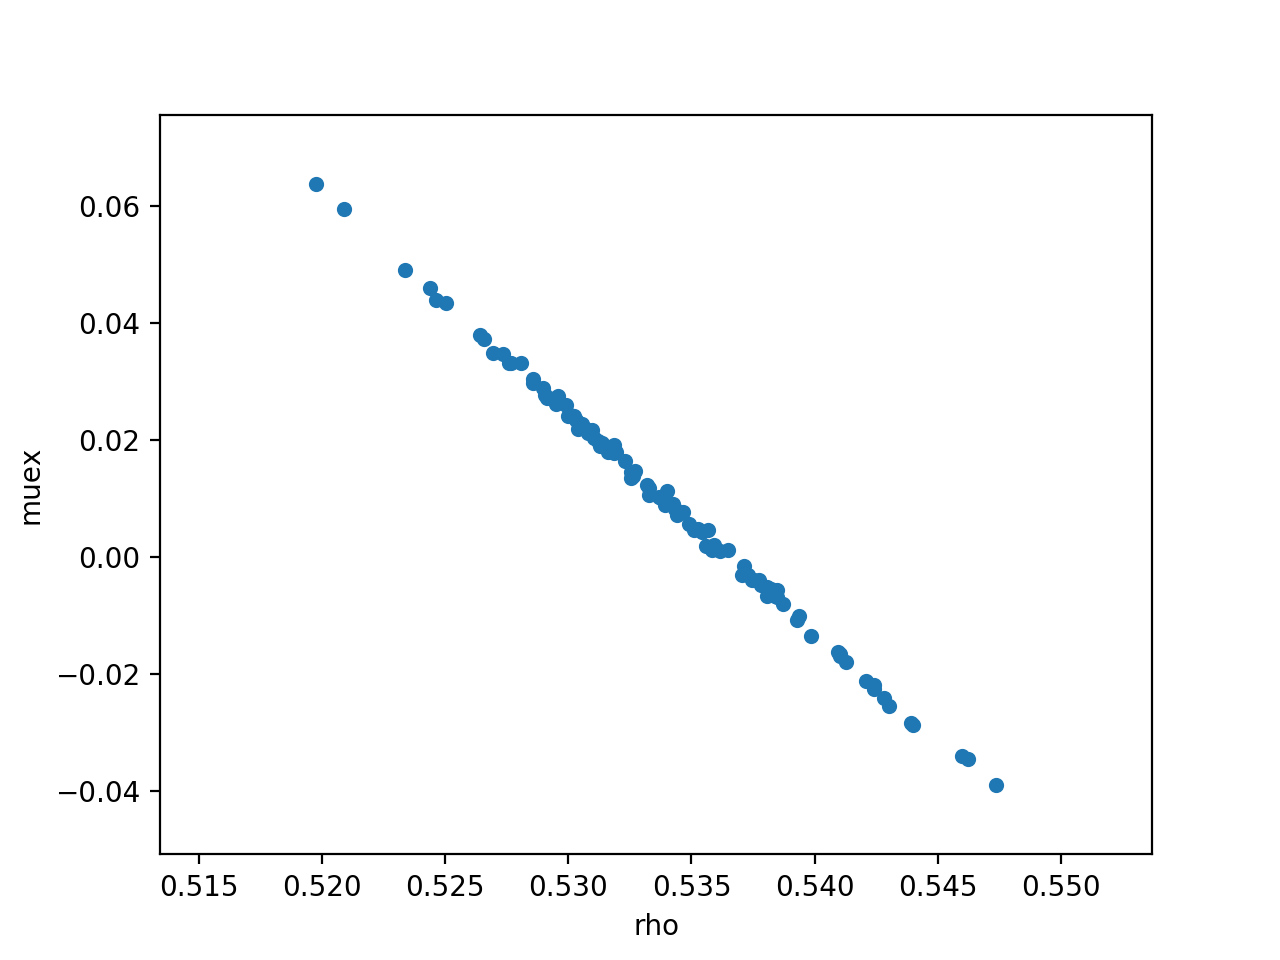

In [108]:
data.plot("rho", "muex", kind="scatter")

<IPython.core.display.Javascript object>


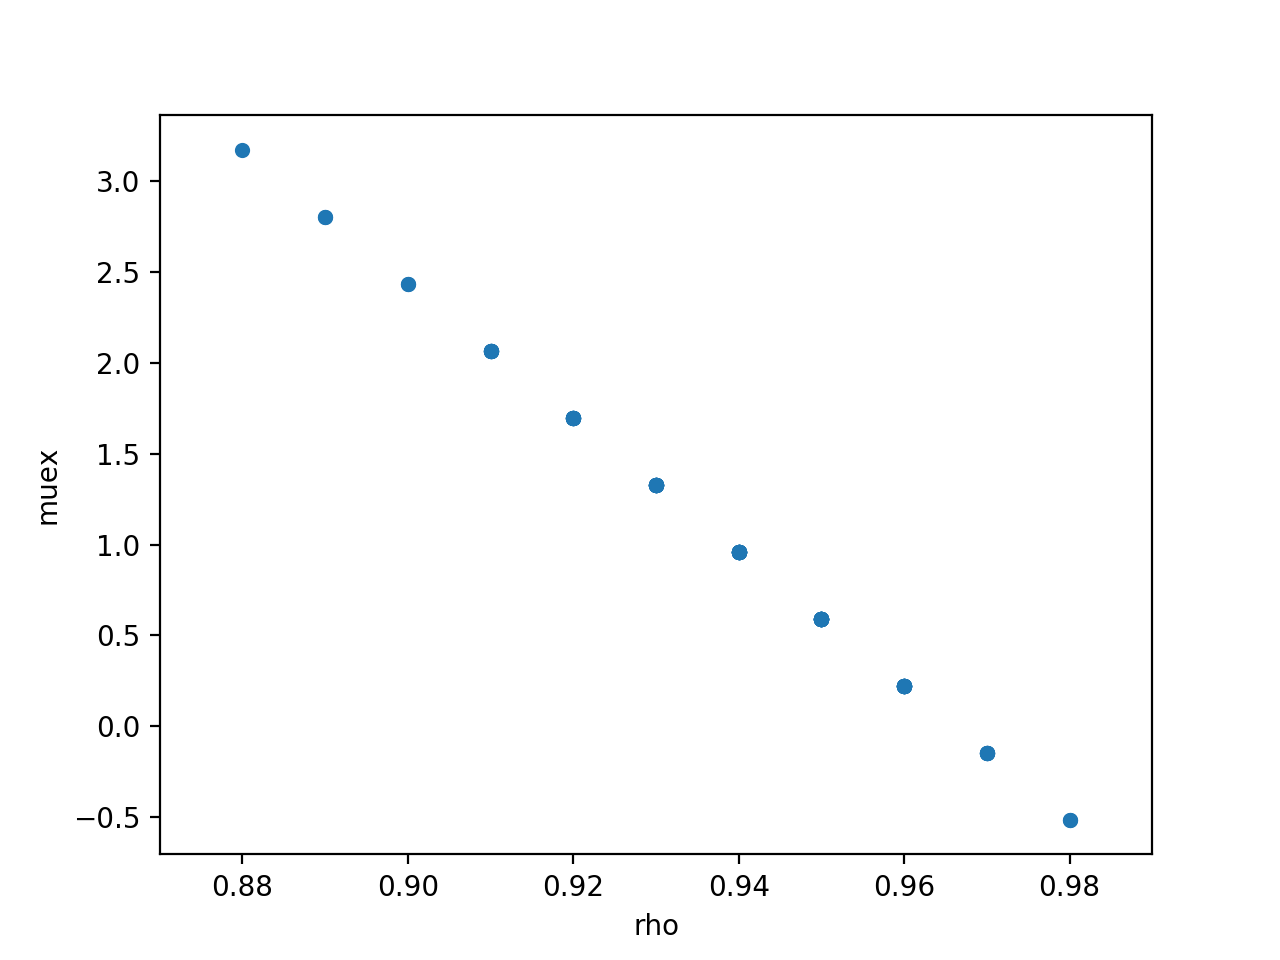

In [130]:
data2.plot("rho", "muex", kind="scatter")

In [125]:
5.**(1/3)

1.7099759466766968

In [114]:
0.53*5.**(1/3)

0.9062872517386493

<IPython.core.display.Javascript object>


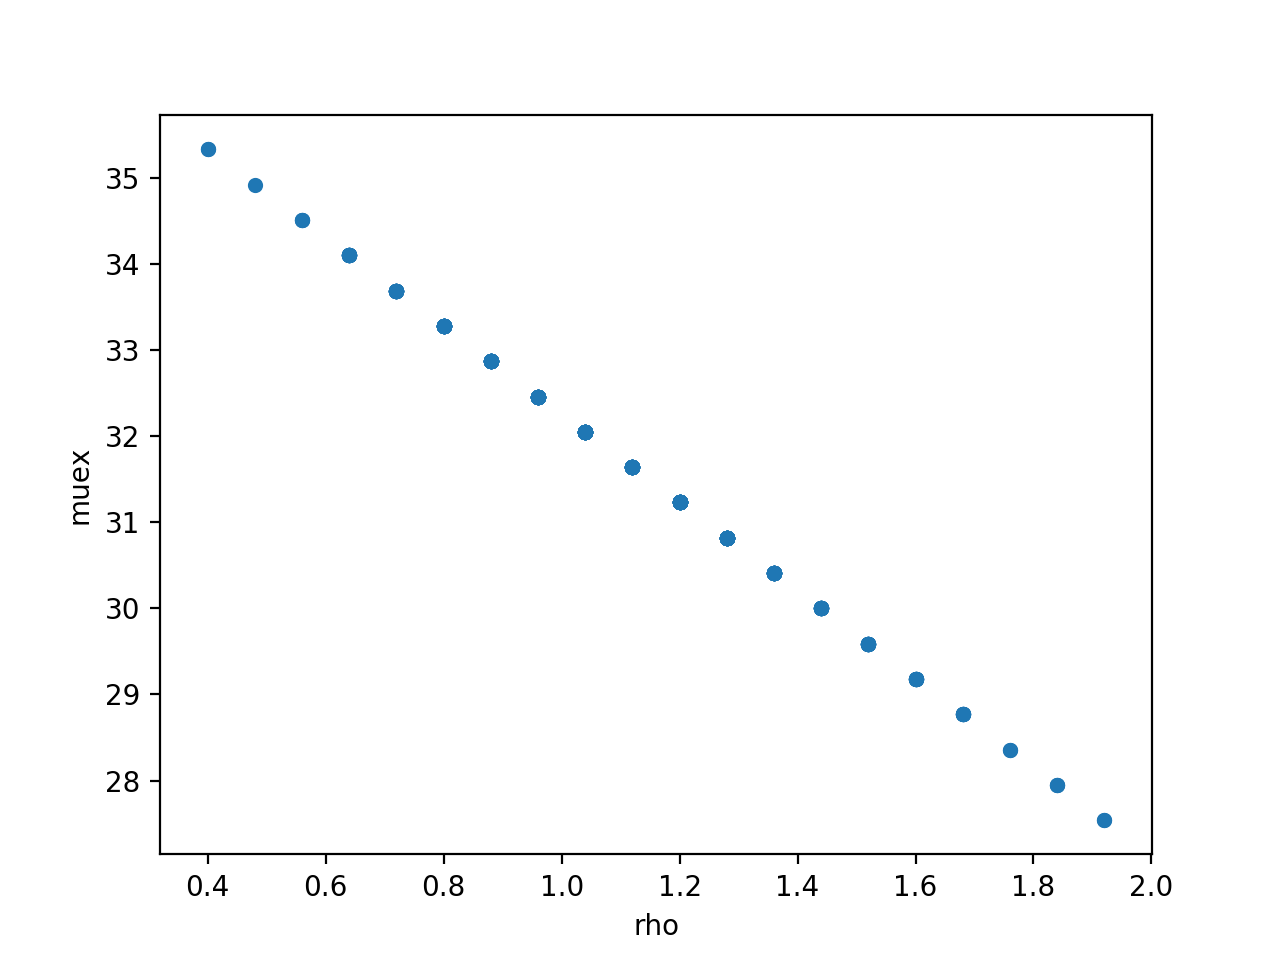

In [139]:
data3 = pd.read_table("/Users/weilu/Documents/yegao/gcmc/rho_vs_p_3.dat", sep="\s+", skiprows=2, names=["TimeStep", "rho", "p", "muex"])
data3.plot("rho", "muex", kind="scatter")



In [136]:
rho_list = np.log(np.array([0.5, 1, 2, 3,4,5]))/(np.log(5))

In [138]:
rho_list*-1.25

array([ 0.5383457 , -0.        , -0.5383457 , -0.85325774, -1.0766914 ,
       -1.25      ])